# Train and test an SVM

## Import boilerplate and setup

In [1]:
# first, change the working directory, if needed
import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
os.getcwd()

'/mnt/c/Users/aryam/Documents/school/2020/spring/cse283/BloodBrainClassifier'

In [2]:
# now, import whatever else we need
import sklearn
import pandas as pd
from sklearn.svm import SVC
import scripts.starter as data
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
"There are {} genes, total".format(len(data.data.columns)-1)

'There are 60675 genes, total'

In [4]:
%%bash --out selected_genes
Rscript scripts/select_DEgenes.R 676

converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 11119 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [4]:
selected_genes = 'ENSG00000276656,ENSG00000207381,ENSG00000280605,ENSG00000223119,ENSG00000281824,ENSG00000251936,ENSG00000257570,ENSG00000201097,ENSG00000254240,ENSG00000200483,ENSG00000252294,ENSG00000201048,ENSG00000277929,ENSG00000207248,ENSG00000281602,ENSG00000253012,ENSG00000200224,ENSG00000253059,ENSG00000206661,ENSG00000274992,ENSG00000222663,ENSG00000222743,ENSG00000212240,ENSG00000199407,ENSG00000253437,ENSG00000201070,ENSG00000202350,ENSG00000238452,ENSG00000211691,ENSG00000238391,ENSG00000251748,ENSG00000238256,ENSG00000276961,ENSG00000200106,ENSG00000207803,ENSG00000207252,ENSG00000260067,ENSG00000253043,ENSG00000252823,ENSG00000260688,ENSG00000251934,ENSG00000252210,ENSG00000272707,ENSG00000263926,ENSG00000206718,ENSG00000252097,ENSG00000252132,ENSG00000201627,ENSG00000275790,ENSG00000201545,ENSG00000251728,ENSG00000200525,ENSG00000216014,ENSG00000207734,ENSG00000265879,ENSG00000280673,ENSG00000238448,ENSG00000201047,ENSG00000200873,ENSG00000252383,ENSG00000274054,ENSG00000212468,ENSG00000252326,ENSG00000221309,ENSG00000272262,ENSG00000238827,ENSG00000258224,ENSG00000207365,ENSG00000252702,ENSG00000252639,ENSG00000225825,ENSG00000252976,ENSG00000206854,ENSG00000221510,ENSG00000276064,ENSG00000199764,ENSG00000200120,ENSG00000278752,ENSG00000207208,ENSG00000221221,ENSG00000263903,ENSG00000275686,ENSG00000222869,ENSG00000274190,ENSG00000273742,ENSG00000222924,ENSG00000207328,ENSG00000238490,ENSG00000264114,ENSG00000252096,ENSG00000252013,ENSG00000199224,ENSG00000211837,ENSG00000222719,ENSG00000201264,ENSG00000278335,ENSG00000201847,ENSG00000206800,ENSG00000281071,ENSG00000251753,ENSG00000207625,ENSG00000252177,ENSG00000252057,ENSG00000264698,ENSG00000201500,ENSG00000200437,ENSG00000207045,ENSG00000222548,ENSG00000223062,ENSG00000252047,ENSG00000277939,ENSG00000199880,ENSG00000252767,ENSG00000212114,ENSG00000276479,ENSG00000281192,ENSG00000264906,ENSG00000222209,ENSG00000276694,ENSG00000207135,ENSG00000281359,ENSG00000238364,ENSG00000216098,ENSG00000200941,ENSG00000199784,ENSG00000211864,ENSG00000278281,ENSG00000200130,ENSG00000254045,ENSG00000200849,ENSG00000221793,ENSG00000280919,ENSG00000264477,ENSG00000199894,ENSG00000252247,ENSG00000275344,ENSG00000275770,ENSG00000211827,ENSG00000202293,ENSG00000223191,ENSG00000238508,ENSG00000265861,ENSG00000207568,ENSG00000265498,ENSG00000266104,ENSG00000201363,ENSG00000264314,ENSG00000273789,ENSG00000252811,ENSG00000266857,ENSG00000280779,ENSG00000281656,ENSG00000258173,ENSG00000199390,ENSG00000222733,ENSG00000200677,ENSG00000238672,ENSG00000212017,ENSG00000266416,ENSG00000252307,ENSG00000169291,ENSG00000103275,ENSG00000181555,ENSG00000105499,ENSG00000107099,ENSG00000273274,ENSG00000100767,ENSG00000196975,ENSG00000118873,ENSG00000247627,ENSG00000230243,ENSG00000109654,ENSG00000187621,ENSG00000267327,ENSG00000107263,ENSG00000149177,ENSG00000161671,ENSG00000258966,ENSG00000111913,ENSG00000165474,ENSG00000075292,ENSG00000254212,ENSG00000266988,ENSG00000052841,ENSG00000231485,ENSG00000132300,ENSG00000124588,ENSG00000260742,ENSG00000250945,ENSG00000265218,ENSG00000271508,ENSG00000274124,ENSG00000163803,ENSG00000118997,ENSG00000250835,ENSG00000260602,ENSG00000183317,ENSG00000223107,ENSG00000088387,ENSG00000135870,ENSG00000164080,ENSG00000115687,ENSG00000153071,ENSG00000158023,ENSG00000108469,ENSG00000257820,ENSG00000275084,ENSG00000236189,ENSG00000228874,ENSG00000231780,ENSG00000167644,ENSG00000239211,ENSG00000185634,ENSG00000246430,ENSG00000115020,ENSG00000249119,ENSG00000151883,ENSG00000101745,ENSG00000134250,ENSG00000180998,ENSG00000112139,ENSG00000259021,ENSG00000274121,ENSG00000249514,ENSG00000154914,ENSG00000258981,ENSG00000104723,ENSG00000100345,ENSG00000099331,ENSG00000152495,ENSG00000136861,ENSG00000230918,ENSG00000182534,ENSG00000103495,ENSG00000112246,ENSG00000223518,ENSG00000250398,ENSG00000188522,ENSG00000110436,ENSG00000119321,ENSG00000145833,ENSG00000269320,ENSG00000127399,ENSG00000091986,ENSG00000124721,ENSG00000279512,ENSG00000157741,ENSG00000182944,ENSG00000100614,ENSG00000257830,ENSG00000198743,ENSG00000124788,ENSG00000235810,ENSG00000201501,ENSG00000143847,ENSG00000224061,ENSG00000071054,ENSG00000201749,ENSG00000278128,ENSG00000254830,ENSG00000281338,ENSG00000201395,ENSG00000124882,ENSG00000112769,ENSG00000117133,ENSG00000117525,ENSG00000146872,ENSG00000068878,ENSG00000230416,ENSG00000117598,ENSG00000065371,ENSG00000279879,ENSG00000162510,ENSG00000186891,ENSG00000162746,ENSG00000271298,ENSG00000267325,ENSG00000008513,ENSG00000211784,ENSG00000243144,ENSG00000180425,ENSG00000199667,ENSG00000214694,ENSG00000106976,ENSG00000125304,ENSG00000182841,ENSG00000173898,ENSG00000261609,ENSG00000226688,ENSG00000108021,ENSG00000115808,ENSG00000116260,ENSG00000128641,ENSG00000240934,ENSG00000113441,ENSG00000273725,ENSG00000161270,ENSG00000232224,ENSG00000144867,ENSG00000271200,ENSG00000272578,ENSG00000059122,ENSG00000206662,ENSG00000114270,ENSG00000234456,ENSG00000162782,ENSG00000213184,ENSG00000220949,ENSG00000237601,ENSG00000226580,ENSG00000251366,ENSG00000013573,ENSG00000117868,ENSG00000164107,ENSG00000205500,ENSG00000198642,ENSG00000244756,ENSG00000221809,ENSG00000105520,ENSG00000143816,ENSG00000270571,ENSG00000082269,ENSG00000258734,ENSG00000099341,ENSG00000206779,ENSG00000179915,ENSG00000159140,ENSG00000196428,ENSG00000200867,ENSG00000105784,ENSG00000196417,ENSG00000231163,ENSG00000233677,ENSG00000165995,ENSG00000164651,ENSG00000175727,ENSG00000259588,ENSG00000188013,ENSG00000275015,ENSG00000264384,ENSG00000232368,ENSG00000141837,ENSG00000235550,ENSG00000196914,ENSG00000005483,ENSG00000145675,ENSG00000270782,ENSG00000104714,ENSG00000107147,ENSG00000267009,ENSG00000278657,ENSG00000212558,ENSG00000137177,ENSG00000204138,ENSG00000237751,ENSG00000153827,ENSG00000251105,ENSG00000112541,ENSG00000280991,ENSG00000106624,ENSG00000215380,ENSG00000256494,ENSG00000158234,ENSG00000252321,ENSG00000124831,ENSG00000132323,ENSG00000084092,ENSG00000122012,ENSG00000185811,ENSG00000127377,ENSG00000225830,ENSG00000251550,ENSG00000004059,ENSG00000198914,ENSG00000271378,ENSG00000151923,ENSG00000222238,ENSG00000252371,ENSG00000155744,ENSG00000164296,ENSG00000083896,ENSG00000187446,ENSG00000255823,ENSG00000102893,ENSG00000240014,ENSG00000279171,ENSG00000226261,ENSG00000241131,ENSG00000153933,ENSG00000116117,ENSG00000182568,ENSG00000123243,ENSG00000157617,ENSG00000196581,ENSG00000075914,ENSG00000201668,ENSG00000174136,ENSG00000109118,ENSG00000276988,ENSG00000261787,ENSG00000089094,ENSG00000185630,ENSG00000270664,ENSG00000178397,ENSG00000280086,ENSG00000011465,ENSG00000157540,ENSG00000225176,ENSG00000220076,ENSG00000245888,ENSG00000164663,ENSG00000169302,ENSG00000171302,ENSG00000278988,ENSG00000235408,ENSG00000257230,ENSG00000256128,ENSG00000104093,ENSG00000207757,ENSG00000253602,ENSG00000222923,ENSG00000040341,ENSG00000138760,ENSG00000038382,ENSG00000152582,ENSG00000274299,ENSG00000107957,ENSG00000139218,ENSG00000111335,ENSG00000126261,ENSG00000146216,ENSG00000254656,ENSG00000274979,ENSG00000254719,ENSG00000108010,ENSG00000200360,ENSG00000276462,ENSG00000238221,ENSG00000109758,ENSG00000278983,ENSG00000173947,ENSG00000183814,ENSG00000279072,ENSG00000182707,ENSG00000225658,ENSG00000254874,ENSG00000146648,ENSG00000079337,ENSG00000227279,ENSG00000273218,ENSG00000125629,ENSG00000077147,ENSG00000103932,ENSG00000188807,ENSG00000281406,ENSG00000239354,ENSG00000198938,ENSG00000177311,ENSG00000115970,ENSG00000230170,ENSG00000253720,ENSG00000196876,ENSG00000137802,ENSG00000152223,ENSG00000155542,ENSG00000051620,ENSG00000256070,ENSG00000227141,ENSG00000240137,ENSG00000075290,ENSG00000237027,ENSG00000260096,ENSG00000134644,ENSG00000249846,ENSG00000271118,ENSG00000131626,ENSG00000271532,ENSG00000225064,ENSG00000280443,ENSG00000119283,ENSG00000135477,ENSG00000103723,ENSG00000175175,ENSG00000253833,ENSG00000198739,ENSG00000165416,ENSG00000165304,ENSG00000217169,ENSG00000132967,ENSG00000114200,ENSG00000221887,ENSG00000198911,ENSG00000135686,ENSG00000033178,ENSG00000143674,ENSG00000163931,ENSG00000223986,ENSG00000272602,ENSG00000197888,ENSG00000038002,ENSG00000222626,ENSG00000155085,ENSG00000212242,ENSG00000128585,ENSG00000136014,ENSG00000201155,ENSG00000176438,ENSG00000200556,ENSG00000161547,ENSG00000159788,ENSG00000081277,ENSG00000199901,ENSG00000164265,ENSG00000103544,ENSG00000219665,ENSG00000158296,ENSG00000225790,ENSG00000199263,ENSG00000159761,ENSG00000272150,ENSG00000207267,ENSG00000178568,ENSG00000152580,ENSG00000274472,ENSG00000156103,ENSG00000279656,ENSG00000182218,ENSG00000222598,ENSG00000243911,ENSG00000255410,ENSG00000163395,ENSG00000212397,ENSG00000252797,ENSG00000201519,ENSG00000183486,ENSG00000164385,ENSG00000109917,ENSG00000197969,ENSG00000231915,ENSG00000137460,ENSG00000132424,ENSG00000237205,ENSG00000270937,ENSG00000175352,ENSG00000157557,ENSG00000259277,ENSG00000104331,ENSG00000167112,ENSG00000202081,ENSG00000103174,ENSG00000276605,ENSG00000126698,ENSG00000259666,ENSG00000253064,ENSG00000166510,ENSG00000236745,ENSG00000180398,ENSG00000226124,ENSG00000264676,ENSG00000176299,ENSG00000186847,ENSG00000091831,ENSG00000197852,ENSG00000198727,ENSG00000184601,ENSG00000232335,ENSG00000007908,ENSG00000100393,ENSG00000198804,ENSG00000145734,ENSG00000232751,ENSG00000232153,ENSG00000226470,ENSG00000136697,ENSG00000213854,ENSG00000126814,ENSG00000260125,ENSG00000100380,ENSG00000238220,ENSG00000114349,ENSG00000249851,ENSG00000107290,ENSG00000202473,ENSG00000254530,ENSG00000162636,ENSG00000090376,ENSG00000280903,ENSG00000239192,ENSG00000251441,ENSG00000274749,ENSG00000252130,ENSG00000149091,ENSG00000254038,ENSG00000213064,ENSG00000235101,ENSG00000188107,ENSG00000165084,ENSG00000222174,ENSG00000207164,ENSG00000204277,ENSG00000114541,ENSG00000257522,ENSG00000276975,ENSG00000071909,ENSG00000248393,ENSG00000254507,ENSG00000134824,ENSG00000149256,ENSG00000283095,ENSG00000183454,ENSG00000176136,ENSG00000101104,ENSG00000083812,ENSG00000211640,ENSG00000253448,ENSG00000143365,ENSG00000178295,ENSG00000054219,ENSG00000013364,ENSG00000173621,ENSG00000268460,ENSG00000180205,ENSG00000230806,ENSG00000235061,ENSG00000174231,ENSG00000278681,ENSG00000162105,ENSG00000105792,ENSG00000143776,ENSG00000231396,ENSG00000264829,ENSG00000186115,ENSG00000253126,ENSG00000198712,ENSG00000157212,ENSG00000236956,ENSG00000199672,ENSG00000171490,ENSG00000134986,ENSG00000153721,ENSG00000244235,ENSG00000139880,ENSG00000133627,ENSG00000252324,ENSG00000121236,ENSG00000253973,ENSG00000162144,ENSG00000281186,ENSG00000278126,ENSG00000220990,ENSG00000048471,ENSG00000140749,ENSG00000166473,ENSG00000183688,ENSG00000266050,ENSG00000141556,ENSG00000278525,ENSG00000142449,ENSG00000099785,ENSG00000212133,ENSG00000270915,ENSG00000055483,ENSG00000275293,ENSG00000198842,ENSG00000149133,ENSG00000242391,ENSG00000206949,ENSG00000227138,ENSG00000172638,ENSG00000121904,ENSG00000143032,ENSG00000158435,ENSG00000237458,ENSG00000226237,ENSG00000161956,ENSG00000281662'
# selected_genes = 'ENSG00000276656,ENSG00000207381,ENSG00000280605,ENSG00000223119,ENSG00000281824,ENSG00000251936,ENSG00000257570,ENSG00000201097,ENSG00000254240,ENSG00000200483,ENSG00000252294,ENSG00000201048,ENSG00000277929,ENSG00000207248,ENSG00000281602,ENSG00000253012,ENSG00000200224,ENSG00000253059,ENSG00000206661,ENSG00000274992,ENSG00000222663,ENSG00000222743,ENSG00000212240,ENSG00000199407,ENSG00000253437,ENSG00000201070,ENSG00000202350,ENSG00000238452,ENSG00000211691,ENSG00000238391,ENSG00000251748,ENSG00000238256,ENSG00000276961,ENSG00000200106,ENSG00000207803,ENSG00000207252,ENSG00000260067,ENSG00000253043,ENSG00000252823,ENSG00000260688,ENSG00000251934,ENSG00000252210,ENSG00000272707,ENSG00000263926,ENSG00000206718,ENSG00000252097,ENSG00000252132,ENSG00000201627,ENSG00000275790,ENSG00000201545,ENSG00000251728,ENSG00000200525,ENSG00000216014,ENSG00000207734,ENSG00000265879,ENSG00000280673,ENSG00000238448,ENSG00000201047,ENSG00000200873,ENSG00000252383,ENSG00000274054,ENSG00000212468,ENSG00000252326,ENSG00000221309,ENSG00000272262,ENSG00000238827,ENSG00000258224,ENSG00000207365,ENSG00000252702,ENSG00000252639,ENSG00000225825,ENSG00000252976,ENSG00000206854,ENSG00000221510,ENSG00000276064,ENSG00000199764,ENSG00000200120,ENSG00000278752,ENSG00000207208,ENSG00000221221,ENSG00000263903,ENSG00000275686,ENSG00000222869,ENSG00000274190,ENSG00000273742,ENSG00000222924,ENSG00000207328,ENSG00000238490,ENSG00000264114,ENSG00000252096,ENSG00000252013,ENSG00000199224,ENSG00000211837,ENSG00000222719,ENSG00000201264,ENSG00000278335,ENSG00000201847,ENSG00000206800,ENSG00000281071,ENSG00000251753,ENSG00000207625,ENSG00000252177,ENSG00000252057,ENSG00000264698,ENSG00000201500,ENSG00000200437,ENSG00000207045,ENSG00000222548,ENSG00000223062,ENSG00000252047,ENSG00000277939,ENSG00000199880,ENSG00000252767,ENSG00000212114,ENSG00000276479'
# selected_genes = 'ENSG00000276656,ENSG00000207381,ENSG00000280605,ENSG00000223119,ENSG00000281824,ENSG00000251936,ENSG00000257570,ENSG00000201097,ENSG00000254240,ENSG00000200483,ENSG00000252294,ENSG00000201048,ENSG00000277929,ENSG00000207248,ENSG00000281602,ENSG00000253012,ENSG00000200224,ENSG00000253059,ENSG00000206661,ENSG00000274992,ENSG00000222663,ENSG00000222743,ENSG00000212240,ENSG00000199407,ENSG00000253437,ENSG00000201070,ENSG00000202350,ENSG00000238452,ENSG00000211691,ENSG00000238391,ENSG00000251748,ENSG00000238256,ENSG00000276961,ENSG00000200106,ENSG00000207803,ENSG00000207252,ENSG00000260067,ENSG00000253043,ENSG00000252823,ENSG00000260688,ENSG00000251934,ENSG00000252210,ENSG00000272707,ENSG00000263926,ENSG00000206718,ENSG00000252097,ENSG00000252132,ENSG00000201627,ENSG00000275790,ENSG00000201545,ENSG00000251728,ENSG00000200525,ENSG00000216014,ENSG00000207734,ENSG00000265879,ENSG00000280673,ENSG00000238448,ENSG00000201047,ENSG00000200873,ENSG00000252383,ENSG00000274054,ENSG00000212468,ENSG00000252326,ENSG00000221309,ENSG00000272262,ENSG00000238827,ENSG00000258224,ENSG00000207365,ENSG00000252702,ENSG00000252639,ENSG00000225825,ENSG00000252976,ENSG00000206854,ENSG00000221510,ENSG00000276064'
selected_genes

'ENSG00000276656,ENSG00000207381,ENSG00000280605,ENSG00000223119,ENSG00000281824,ENSG00000251936,ENSG00000257570,ENSG00000201097,ENSG00000254240,ENSG00000200483,ENSG00000252294,ENSG00000201048,ENSG00000277929,ENSG00000207248,ENSG00000281602,ENSG00000253012,ENSG00000200224,ENSG00000253059,ENSG00000206661,ENSG00000274992,ENSG00000222663,ENSG00000222743,ENSG00000212240,ENSG00000199407,ENSG00000253437,ENSG00000201070,ENSG00000202350,ENSG00000238452,ENSG00000211691,ENSG00000238391,ENSG00000251748,ENSG00000238256,ENSG00000276961,ENSG00000200106,ENSG00000207803,ENSG00000207252,ENSG00000260067,ENSG00000253043,ENSG00000252823,ENSG00000260688,ENSG00000251934,ENSG00000252210,ENSG00000272707,ENSG00000263926,ENSG00000206718,ENSG00000252097,ENSG00000252132,ENSG00000201627,ENSG00000275790,ENSG00000201545,ENSG00000251728,ENSG00000200525,ENSG00000216014,ENSG00000207734,ENSG00000265879,ENSG00000280673,ENSG00000238448,ENSG00000201047,ENSG00000200873,ENSG00000252383,ENSG00000274054,ENSG00000212468,ENSG000

In [5]:
data.data = data.data[selected_genes.split(',') + ['group']]
data.split()
len(data.data.columns)

677

## Train SVC model

In [6]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=.01))
clf.fit(data.X_train, data.y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, kernel='linear'))])

## Test SVC model and evaluate the model's performance

In [7]:
y_pred = clf.predict(data.X_test)

In [8]:
clf.score(data.X_test, data.y_test)

0.696969696969697

Wow, that's pretty terrible. Is there any way we can improve that?

First, let's ask ourselves what the model might be doing wrong. Let's compare the predictions to the true labels.

In [9]:
pd.concat((data.y_test, pd.Series(y_pred, index=data.y_test.index)), axis=1)

,group,0
sample,,
N_7_01_1,0,1
AD_7_06_1,1,1
N_3_03_1,0,1
N_9_08_1,0,0
N_5_06_1,0,1
N_2_03_1,0,0
N_8_07_1,0,0
AD_2_02_1,1,1
AD_11_02_1,1,1


In [10]:
clf.decision_function(data.X_test)

array([ 0.55142411,  0.89176074,  1.48269812, -1.88957031,  0.5866335 ,
       -1.53672551, -0.66793164,  1.87026696,  0.86460652,  1.2701662 ,
        0.07875363,  0.62228724,  0.27157323, -0.17228482,  0.39651219,
        0.30101367, -1.53602605,  0.41606092, -0.6104952 ,  0.82152499,
       -0.14563888,  7.58586614,  3.11744849, -2.37231542,  0.95938453,
        0.82600596,  0.9425325 ,  0.23929172,  0.76661   , -0.06069841,
        0.2479256 ,  0.37652634, -0.14283403])

## Could there be overfitting?
How does our model perform when given all of the data, compared to before?

In [11]:
clf.fit(data.X, data.y)
clf.score(data.X_test, data.y_test)

1.0

Hmmm.. perhaps

## Are the samples separable to begin with?
Let's take a look at the first two PCs against each other.

In [12]:
from sklearn.decomposition import PCA

<AxesSubplot:xlabel='0', ylabel='1'>

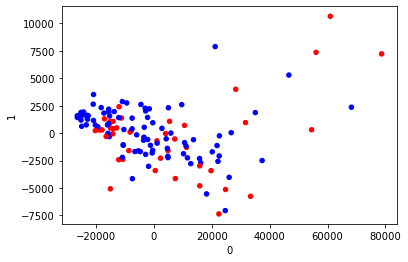

In [13]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(data.X)
pd.DataFrame(X_new).plot.scatter(x=0, y=1, color=['blue' if x else 'red' for x in data.data.group])

In [14]:
from sklearn.model_selection import cross_val_score
clf.fit(data.X_train, data.y_train)
sklearn.model_selection.cross_val_score(clf, data.X, data.y, cv=10)

array([0.85714286, 0.85714286, 0.76923077, 0.92307692, 0.84615385,
       0.76923077, 0.84615385, 0.84615385, 0.69230769, 1.        ])

In [15]:
import scripts.grid_search

model = sklearn.svm.SVC()
tuned_parameters = [{'kernel': ['poly'], 'C': [1, 0.000001], 'degree':[2, 5, 9]},
                    {'kernel': ['rbf'], 'C': [0.01, 0.8, 1, 1.5, 1.7, 2]},
                    {'kernel': ['linear'], 'C': [2, 1, 0.5, 0.1, 0.01]}]

scripts.grid_search.main(
    (data.X_train, data.y_train, data.X_test, data.y_test), SVC(), tuned_parameters, k=10
)

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 2, 'kernel': 'linear'}

Grid scores on development set:

0.411 (+/-0.028) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.462 (+/-0.228) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.577 (+/-0.308) for {'C': 1, 'degree': 9, 'kernel': 'poly'}
0.414 (+/-0.015) for {'C': 1e-06, 'degree': 2, 'kernel': 'poly'}
0.414 (+/-0.015) for {'C': 1e-06, 'degree': 5, 'kernel': 'poly'}
0.456 (+/-0.275) for {'C': 1e-06, 'degree': 9, 'kernel': 'poly'}
0.414 (+/-0.015) for {'C': 0.01, 'kernel': 'rbf'}
0.411 (+/-0.028) for {'C': 0.8, 'kernel': 'rbf'}
0.411 (+/-0.028) for {'C': 1, 'kernel': 'rbf'}
0.438 (+/-0.169) for {'C': 1.5, 'kernel': 'rbf'}
0.438 (+/-0.169) for {'C': 1.7, 'kernel': 'rbf'}
0.438 (+/-0.169) for {'C': 2, 'kernel': 'rbf'}
0.732 (+/-0.251) for {'C': 2, 'kernel': 'linear'}
0.732 (+/-0.251) for {'C': 1, 'kernel': 'linear'}
0.732 (+/-0.251) for {'C': 0.5, 'kernel': 'linear'}
0.732 (+/-0.251) for {'C': 0.1, 'ke

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 1e-06], 'degree': [2, 5, 9],
                          'kernel': ['poly']},
                         {'C': [0.01, 0.8, 1, 1.5, 1.7, 2], 'kernel': ['rbf']},
                         {'C': [2, 1, 0.5, 0.1, 0.01], 'kernel': ['linear']}],
             scoring='f1_macro')